        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [116]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [117]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [118]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [119]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

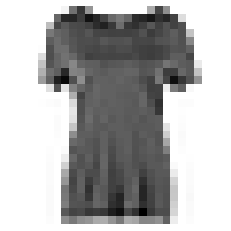

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [121]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [122]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

Observations: Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

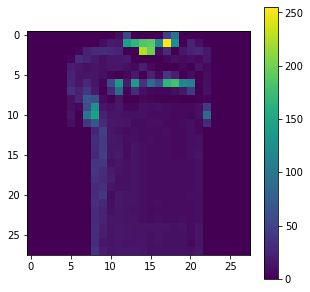

Image(1308): with label number '0', has class_name as 'T-shirt/top'.


In [9]:
#lets visualize one more image and print its Class_name
sample = 1308                                                        #taking some random sample.
each = X_train[sample]

plt.figure(figsize=(5,5))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image({}): with label number '{}', has class_name as '{}'.".format(sample,y_train[sample], class_names[y_train[sample]]))

Visualizing images from dataset in matrix format.


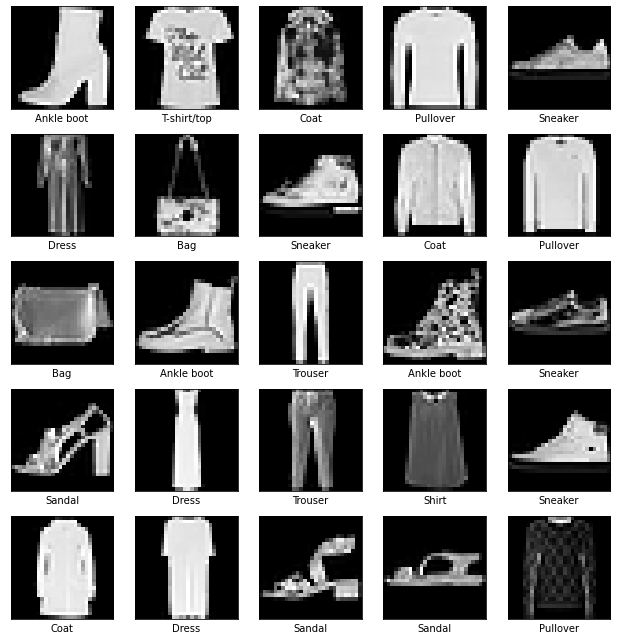

In [10]:
import random
Row = 5
Column = 5
plt.figure(figsize=(9,9)) 
for i in range(Row * Column):
    image_array = random.randint(0, len(X_train)+1)
    image = X_train[image_array] 
    plt.subplot(Row, Column, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[image_array]])
    plt.tight_layout()   
    
plt.show()

Normalizing the dataset and reshaping the array.
Data normalization ensures that the data looks, reads, and can be utilized the same way across all of the records in the database.

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_train.shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Using PCA for dimension reduction
Plotting curve to find how many number of features are required for capturing maximum variance


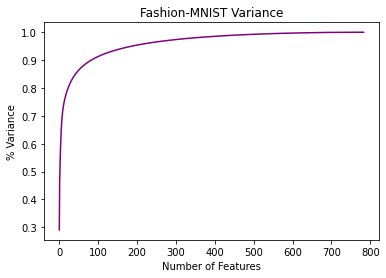

In [14]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='purple')
plt.xlabel('Number of Features')
plt.ylabel('% Variance') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

As shown above, in the graph that after around 350 feature, variance is constant.
so we will have 350 feature to explain the changes in dependent variables.

In [15]:
pca = PCA(n_components=350)
#Reshaping and displaying shape

pca.fit(X_train)
#pca.transform(X_train)
X_train_pca=pca.transform(X_train)

X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 350)
(10000, 350)


supervised learning models I'll be using in part one are Logistic Regression, Gaussian NB, Random Forest, Neural Networks, KNN.

I'll be using AUC, Classification report, Confusion matrix to find out the best model.

# **Task 1: **


Logistic Regression: 
It is easier to implement, interpret, and very efficient to train. It is very fast at classifying unknown records.
accuracy_out_sample: 84.45; 
AUC_score: 0.983

From these results (classification report)  we can see that the classifier has significantly greater difficulty to classify class 6, as it miss-classifies significant amount of samples as class 1 and 9. On the contrary, it performs very well classifying classes 1, 5, 8 and 9, since it does not miss-classify a significant amount of samples.

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
y_test_hat=logmodel.predict(X_test)
y_train_hat=logmodel.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("In sample accuracy:",accuracy_score(y_train,y_train_hat,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat,normalize = True) * 100)

print("confusion Matrix:")
print(confusion_matrix(y_test,y_test_hat))


print("classification report:")
print(classification_report(y_test,y_test_hat))


In sample accuracy: 88.08500000000001
Out sample accuracy: 84.45
confusion Matrix:
[[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  26   4   0   3   0   2   0]
 [ 24   3 739  10 124   0  87   1  12   0]
 [ 24  17  17 861  30   0  40   0  11   0]
 [  0   2 114  37 765   0  75   0   7   0]
 [  0   0   0   1   0 921   0  48   7  23]
 [142   1 121  39 100   0 574   0  23   0]
 [  0   0   0   0   0  34   0 940   0  26]
 [  7   1   8  14   4   6  22   5 933   0]
 [  0   1   0   0   0  12   1  38   0 948]]
classification report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.77      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0

In [18]:
from sklearn.metrics import roc_auc_score
log_auc_score=roc_auc_score(y_test,logmodel.predict_proba(X_test),average='macro',multi_class="ovr")
print("AUC score is : {:.3f}".format(log_auc_score),'\n')

AUC score is : 0.983 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


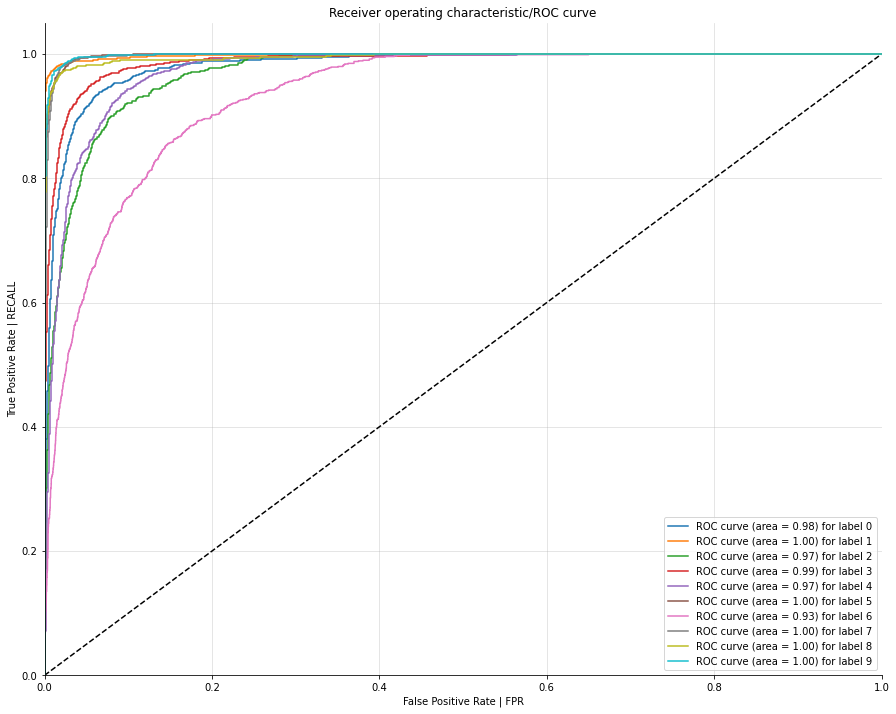

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def plot_dc_roc(clf, X_test, y_test, classes, figsize=(15, 5)):
    y_score = logmodel.fit(X_train, y_train).predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_dc_roc(Pipeline, X_test, y_test, classes=10, figsize=(15, 12))
print(c)

Text(0.5, 1.0, 'logistic')

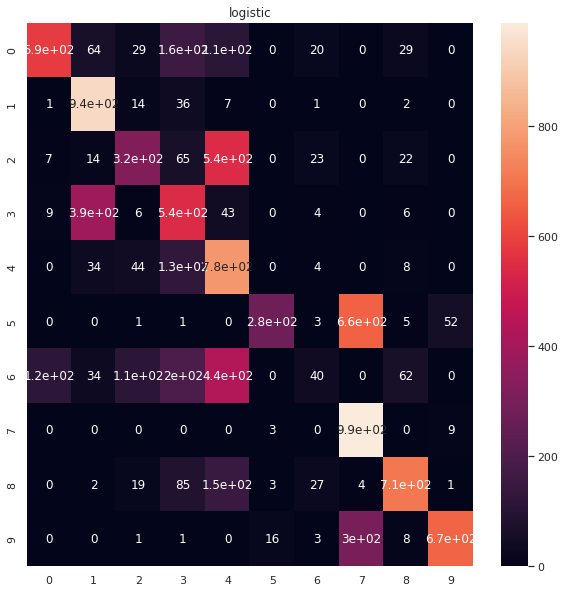

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 
conf_logistic = confusion_matrix(y_test,y_test_hat)
fig,axes = plt.subplots(figsize = (10,10))
sns.heatmap(conf_logistic, annot=True)
axes.set_title("logistic")

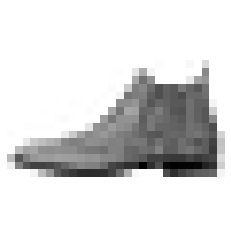

The Predicted class name of the above projected image is: Ankle boot


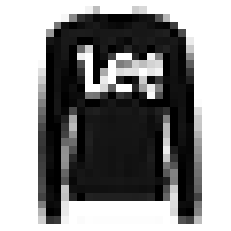

The Predicted class name of the above projected image is: Pullover


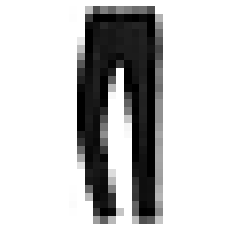

The Predicted class name of the above projected image is: Trouser


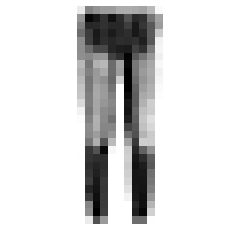

The Predicted class name of the above projected image is: Trouser


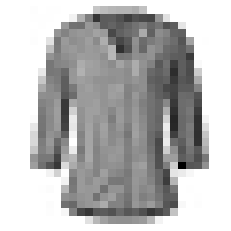

The Predicted class name of the above projected image is: Shirt


In [23]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

Gaussian Naive Bayes: Naive Bayes Classifier does not a appear to perform well for MNIST data set as it produced an overall accuracy of 59%.

The downside in the Naive Bayes classifier is that it assumes the all the dimensions present in the data set is independent to one another and which we know that itâ€™s not correct.

In [40]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train) 
y_test_hat = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test,y_test_hat, normalize = True) * 100
print(classification_report(y_test,y_test_hat))
print("confusion Matrix:")
print(confusion_matrix(y_test,y_test_hat))



              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000

confusion Matrix:
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   

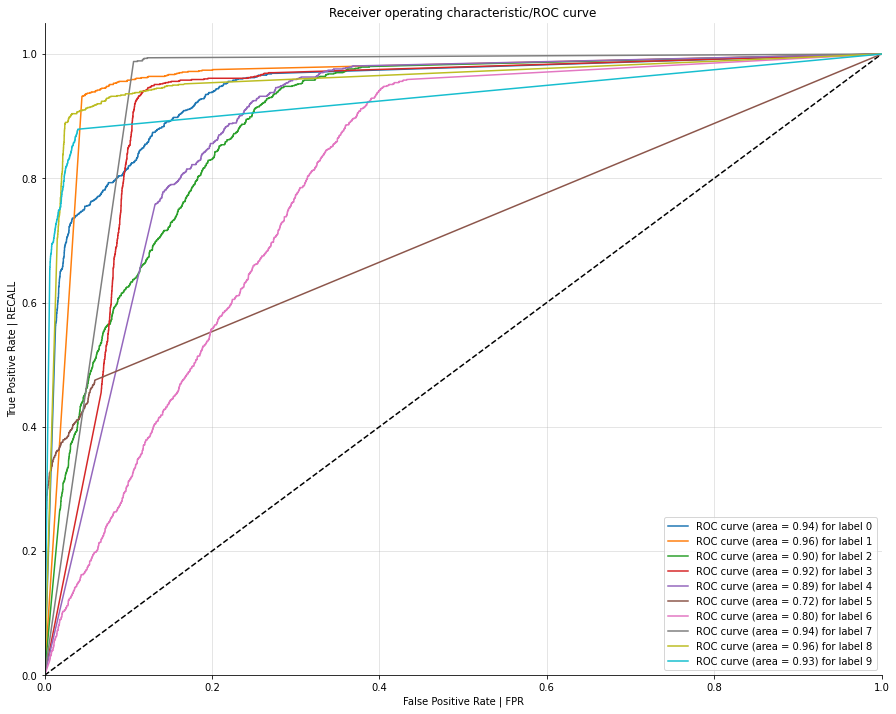

None


In [25]:
def plot_dc_roc(clf, X_test, y_test, classes, figsize=(15, 5)):
    y_score = model.fit(X_train, y_train).predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_dc_roc(Pipeline, X_test, y_test, classes=10, figsize=(15, 12))
print(c)

In [42]:
from sklearn.metrics import roc_auc_score
GaussianNB_auc_score=roc_auc_score(y_test,model.predict_proba(X_test),average='macro',multi_class="ovr")
print("AUC score is : {:.3f}".format(GaussianNB_auc_score),'\n')

AUC score is : 0.895 



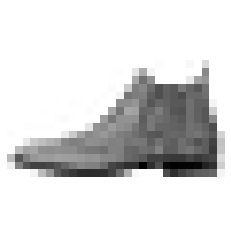

The Predicted class name of the above projected image is: Sneaker


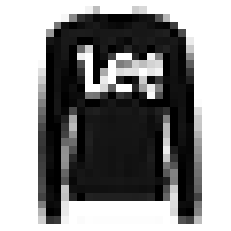

The Predicted class name of the above projected image is: Coat


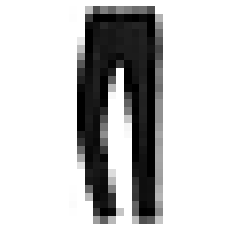

The Predicted class name of the above projected image is: Trouser


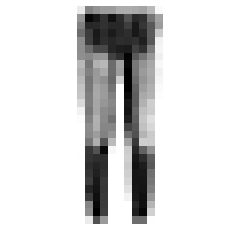

The Predicted class name of the above projected image is: Trouser


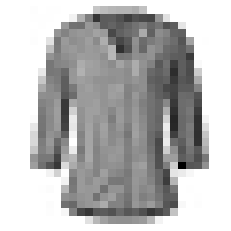

The Predicted class name of the above projected image is: Coat


In [29]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

Random Forest Classifier: Random forest (RF) algorithms are a machine learning technique that is being used increasingly
for image classification26. Formulated through the combination of several decision trees (DTs),
predictive models that use a binary set of rules to calculate a target value, an RF calculates a
prediction based on the outcome of all DTs. In most cases, because utilising an ensemble model
is better than the result from any individual model, a forest of several DTs can be assumed
to be a more accurate model then to a single individual tree.

out sampple accuracy is 87.74

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
y_train_pred = model_RFC.predict(X_train)
y_test_pred = model_RFC.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_pred, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_pred, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

print(classification_report(y_test,y_test_pred))
print("confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred))

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  87.68
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

confusion Matrix:
[[855   0  12  32   3   1  87   0  10   0]
 [  2 960   2  25   3   0   7   0   1   0]
 [ 13   0 809  11 110   0  51   0   6   0]
 [ 17   2  11 911  29   0  29   0   

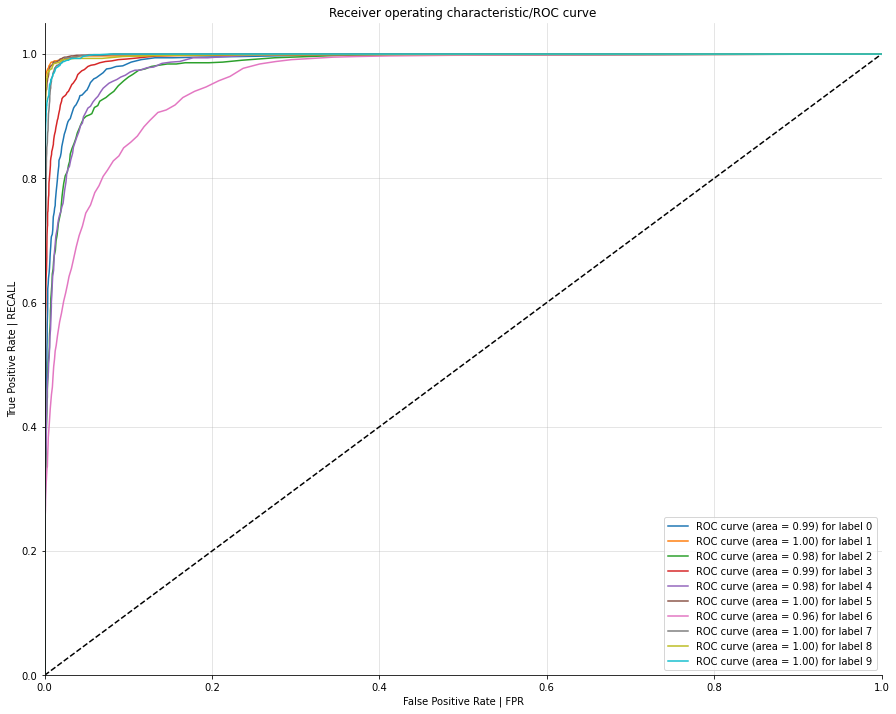

None


In [30]:
def plot_dc_roc(clf, X_test, y_test, classes, figsize=(15, 5)):
    y_score = model_RFC.fit(X_train, y_train).predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_dc_roc(Pipeline, X_test, y_test, classes=10, figsize=(15, 12))
print(c)

In [43]:
from sklearn.metrics import roc_auc_score
RF_auc_score=roc_auc_score(y_test,model_RFC.predict_proba(X_test),average='macro',multi_class="ovr")
print("AUC score is : {:.3f}".format(RF_auc_score),'\n')

AUC score is : 0.989 



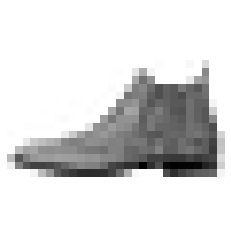

The Predicted class name of the above projected image is: Sneaker


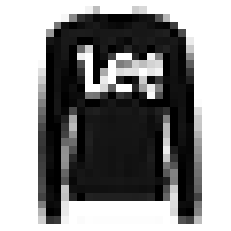

The Predicted class name of the above projected image is: Coat


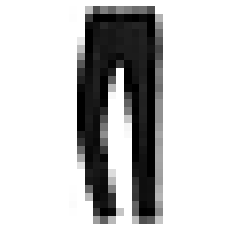

The Predicted class name of the above projected image is: Trouser


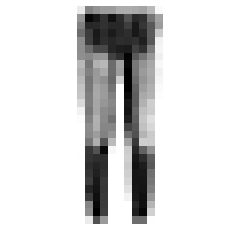

The Predicted class name of the above projected image is: Trouser


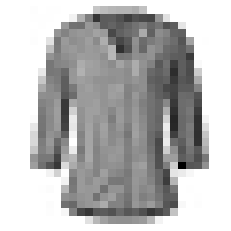

The Predicted class name of the above projected image is: Coat


In [31]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

Neural Networks (Multi-layer Perceptron classifier):
Neural networks are complex models,
solver lbfgs approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets. As our data set isn't that large we can comfortably use this solver.



In [32]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[70,60])
model.fit(X_train,y_train)

# check the accuracy
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

print(classification_report(y_test,y_test_hat))
print("confusion Matrix:")
print(confusion_matrix(y_test,y_test_hat))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In-sample Accuracy:  88.59166666666667
Out-of-sample Accuracy:  86.69
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.83      0.90      0.86      1000
           4       0.78      0.79      0.78      1000
           5       0.96      0.95      0.95      1000
           6       0.70      0.62      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

confusion Matrix:
[[806   0  16  54   3   0 108   0  13   0]
 [  2 963   2  27   3   0   2   0   1   0]
 [ 14   3 789  19 113   0  58   0   4   0]
 [ 20  12  11 901  28   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


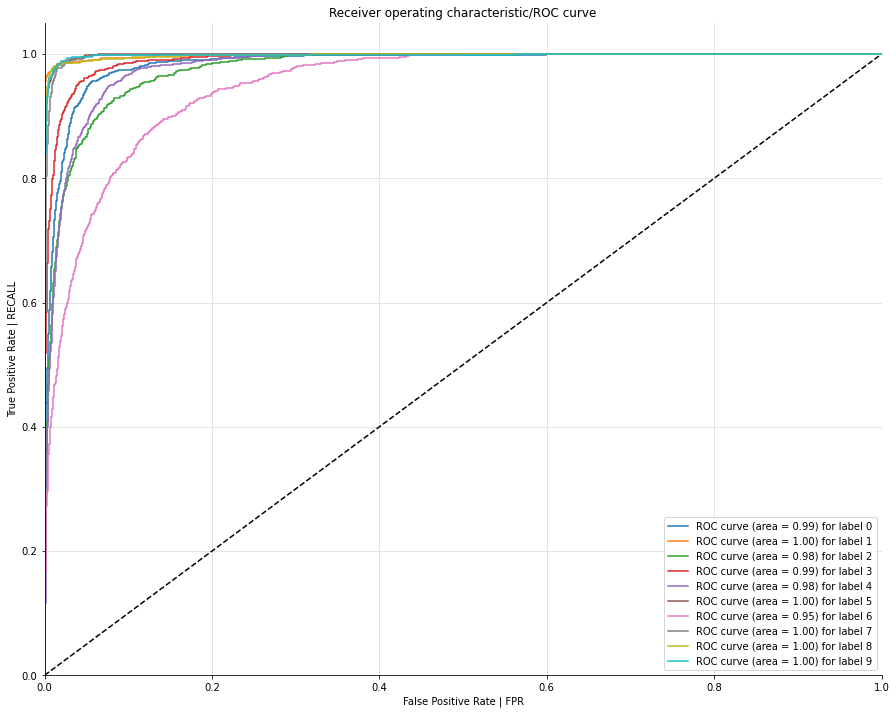

None


In [33]:
def plot_dc_roc(clf, X_test, y_test, classes, figsize=(15, 5)):
    y_score = model.fit(X_train, y_train).predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_dc_roc(Pipeline, X_test, y_test, classes=10, figsize=(15, 12))
print(c)

In [44]:
from sklearn.metrics import roc_auc_score
NN_auc_score=roc_auc_score(y_test,model.predict_proba(X_test),average='macro',multi_class="ovr")
print("AUC score is : {:.3f}".format(NN_auc_score),'\n')

AUC score is : 0.895 



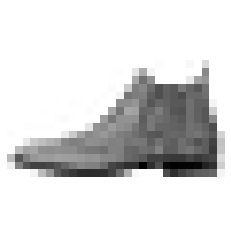

The Predicted class name of the above projected image is: Ankle boot


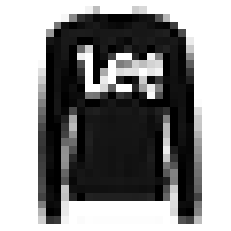

The Predicted class name of the above projected image is: Pullover


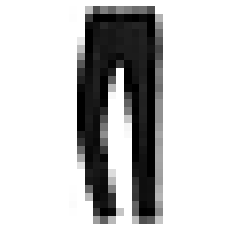

The Predicted class name of the above projected image is: Trouser


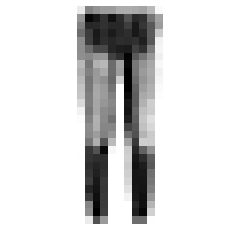

The Predicted class name of the above projected image is: Trouser


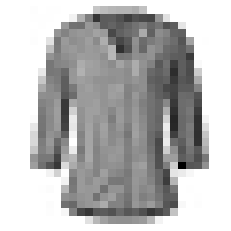

The Predicted class name of the above projected image is: Shirt


In [34]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

K-Nearest Neighbour Model: KNN algorithm is a non-parametric classification algorithm. Knn has high AUC value next to logistic regression and Random forest.

But the accuracy of the model takes it out of the race for being the best model for this data set 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train, y_train)


# let's check the performance of model on test set
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = knnmodel.predict(X_test)
knn_ac=accuracy_score(y_test,y_test_hat, normalize = True) * 100 
print(knn_ac)

print("Confusion Matrix")
cf_matrix = confusion_matrix(y_test,y_test_hat)
print(cf_matrix)
print(classification_report(y_test,y_test_hat))

85.54
Confusion Matrix
[[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
     

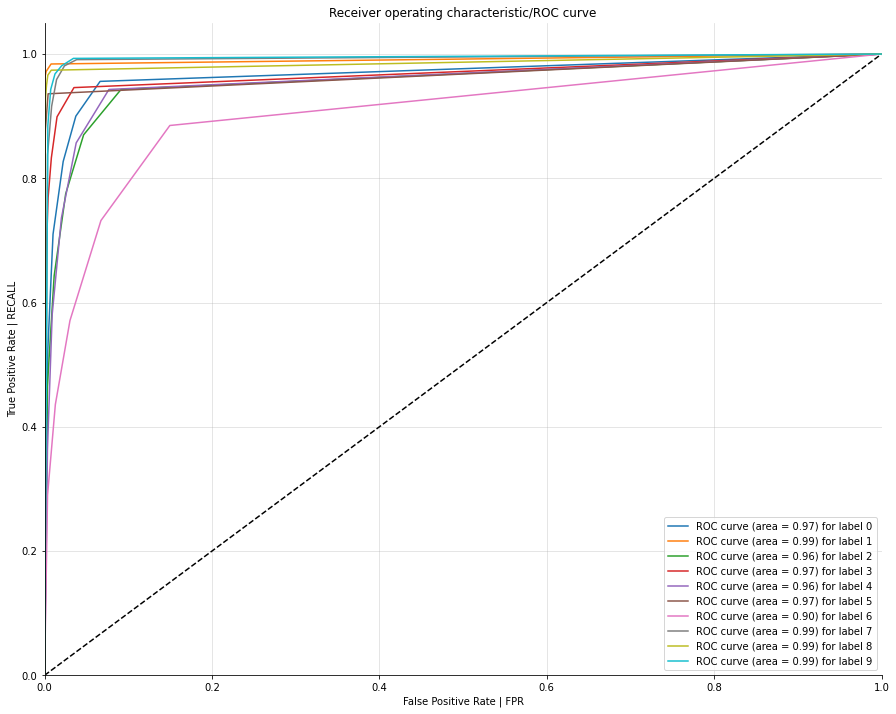

None


In [36]:
def plot_dc_roc(clf, X_test, y_test, classes, figsize=(15, 5)):
    y_score = knnmodel.fit(X_train, y_train).predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_dc_roc(Pipeline, X_test, y_test, classes=10, figsize=(15, 12))
print(c)

In [45]:
from sklearn.metrics import roc_auc_score
KNN_auc_score=roc_auc_score(y_test,knnmodel.predict_proba(X_test),average='macro',multi_class="ovr")
print("AUC score is : {:.3f}".format(KNN_auc_score),'\n')

AUC score is : 0.969 



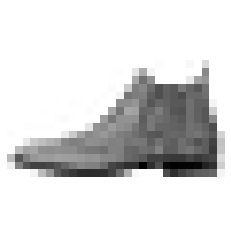

The Predicted class name of the above projected image is: Ankle boot


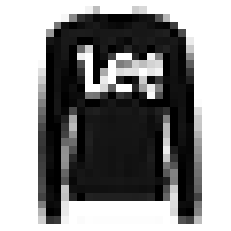

The Predicted class name of the above projected image is: Pullover


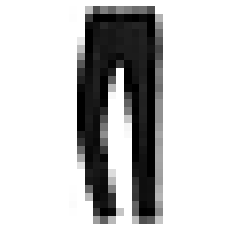

The Predicted class name of the above projected image is: Trouser


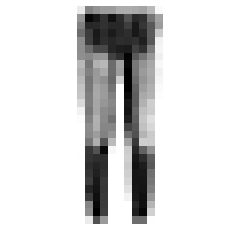

The Predicted class name of the above projected image is: Trouser


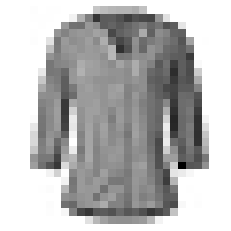

The Predicted class name of the above projected image is: Shirt


In [37]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

Visualizing accuracy of all the models.

Text(0.5, 1.0, '% Accuracy of Models')

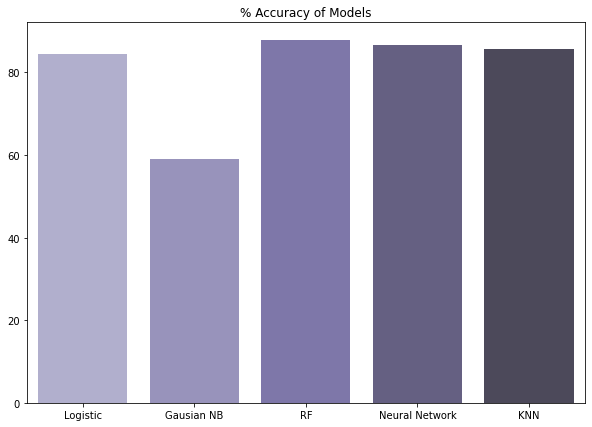

In [38]:
import seaborn as sns
Model_name=['Logistic', 'Gausian NB', 'RF', 'Neural Network', 'KNN']
Model_Data_Accuracy = [84.45,59,87.74,86.69,85.54]
fig, axes = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=Model_name,y=Model_Data_Accuracy,palette='Purples_d').set_title("% Accuracy of Models")

Clearly from the accuray comparison above, we can see that random forest model has the highest accuracy, Model accuracy is defined as the number of classifications a model correctly predicts divided by the total number of predictions made. It's a way of assessing the performance of a model, but certainly not the only way.
The accuracy tells that overall how often the model is making a correct prediction.

Now, Visualizing the AUC values of all the above models 

Text(0.5, 1.0, '% AUC of Models')

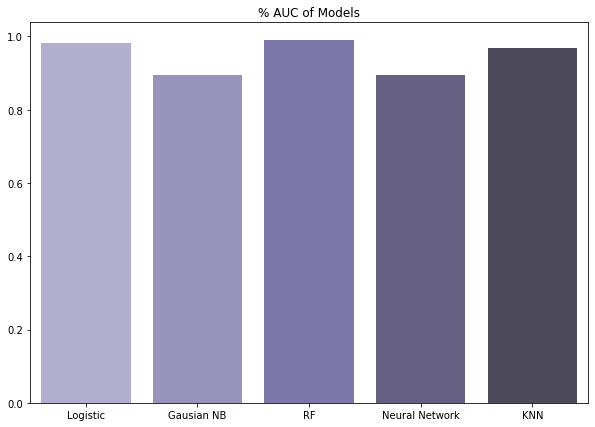

In [47]:
import seaborn as sns
Model_name=['Logistic', 'Gausian NB', 'RF', 'Neural Network', 'KNN']
Model_Data_AUC = [0.983,0.895,0.989,0.895,0.969]
fig, axes = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=Model_name,y=Model_Data_AUC,palette='Purples_d').set_title("% AUC of Models")

Among all the models, AUC value is high for Random forest.
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Based on these comparisons, I determine Random Forest is the best model.



**Task 2:**

picture of five fashion pieces of my own.

code to display the pictures

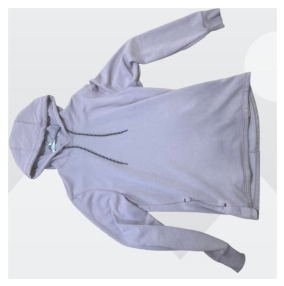

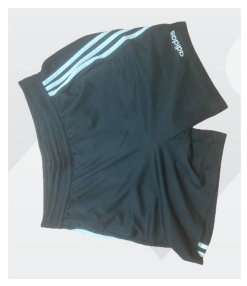

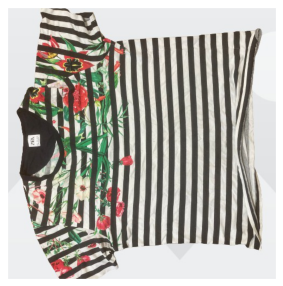

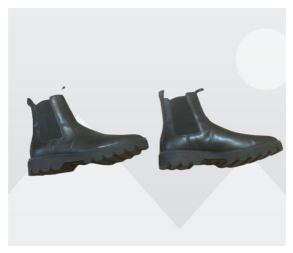

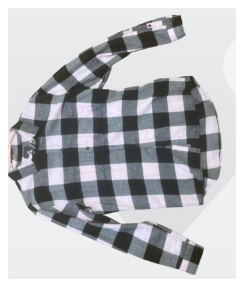

In [167]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image1=np.array(mpimg.imread("/content/sample_data/image1.jpg"))
image2=np.array(mpimg.imread("/content/sample_data/image2.jpg"))
image3=np.array(mpimg.imread("/content/sample_data/image3.jpg"))
image4=np.array(mpimg.imread("/content/sample_data/image4.jpg"))
image5=np.array(mpimg.imread("/content/sample_data/image5.jpg"))

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(image1)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(image2)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(image3)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(image4)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(image5)
ax.set(xticks=[], yticks=[])
plt.show()

In [168]:
pip install Opencv-python

Resizing images to (28,28)

In [169]:
import glob                      #glob and cv2 are used to display all sample pictures in sameline
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
%matplotlib inline
pictures = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/sample_data/*.jpg")]
#path is given to fetch the images from the system and they are converted to grey scale
#cv2.greyscale function is used to convert the image
updated_pictures=[]              #empty array is declared
for img in pictures:             #accessing each image in array of images
    resized_down = cv2.resize(img, (28,28), interpolation= cv2.INTER_LINEAR)        #aligning all the images side by side
    updated_pictures.append(resized_down)             #appending the images to the empty list
grey=updated_pictures                        

In [148]:
len(grey)

5

Converting Images to Grey scale
and visualizing all the 5 images side by side.



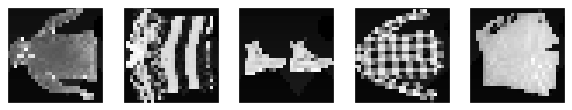

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


In [170]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)             #creting subplot to print all the images in list
    plt.xticks([])        
    plt.yticks([])
    plt.grid(False)
    plt.imshow(grey[i], cmap=plt.cm.binary)
    
plt.show()
n_img = []
print(grey[1].shape)                 #printing shape of the gryscale images
for data in range(len(grey)):
    n_img.append(grey[data].reshape(28,28))   #reshapimng the image to pixels
    print(n_img[data].shape)                  #printing shape of the image for the analysis

Normalising the data in the same way as done to the train data set 

In [171]:
imagearraynew = np.array(n_img)
#normalizing and reshaping of an array

imagearraynew = imagearraynew.astype('float32')
imagearraynew /= 255.0
print(imagearraynew.shape)

(5, 28, 28)


Decreasing the number of features from 784 to 350 using PCA

In [172]:
imagearraynew=imagearraynew.reshape(5,28*28)
#Reshaping and displaying shape
newpca = pca.transform(imagearraynew)
newpca.shape

(5, 350)

Best model in the Task 1 is Random Forest classification 

In [153]:
X_train.shape

(60000, 28, 28)

In [158]:
y_train.shape

(60000,)

In [157]:
imagearraynew.shape

(5, 28, 28)

In [178]:
for i in range(len(imagearraynew)):
  y_pred=model_RFC.predict(imagearraynew[i].reshape(1,784))
  for i in y_pred:
   print(class_names[i])     #predicting the images 

Sandal
Sandal
Sandal
Sandal
Sandal


In [162]:
X_train.shape

(60000, 784)

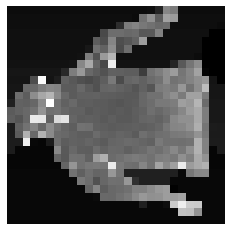

The Predicted class name of the above projected image is: Ankle boot


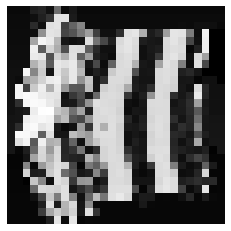

The Predicted class name of the above projected image is: Pullover


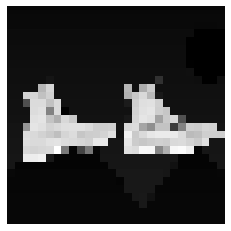

The Predicted class name of the above projected image is: Trouser


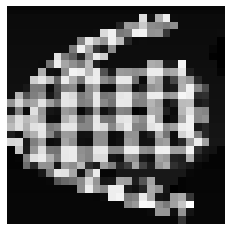

The Predicted class name of the above projected image is: Trouser


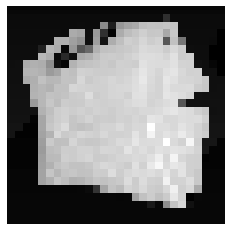

The Predicted class name of the above projected image is: Shirt


In [180]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=imagearraynew[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    y_pred=y_test_pred[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[y_pred])  #class of predicted value as shown above
    i=i+1

How accurate is the final result?


Final result is not very accurate, model could perform well with the better quality of data.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Apr 5 2022 at 7:00 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>